# Visualizations and Statistics Notebook
**Author:** Jake Thomas
**Last Modified:** 12/11/2024 (created: 12/11/2024)

**Description:** Finding summary statistics and creating visualizations of the merged dataframe

In [120]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
# Read in data
df = pd.read_csv("/Users/Jake/Documents/GitHub/Data-Wrangling-Project/data/final/merged_final_dataset.csv")
display(df)

,Player,Overall,Goals,Assists,Expected Goals,Pace,Shooting,Passing,Dribbling,Defending,Physicality,National Team,League,Club Team,Age,Height_cm,Weight_kg,Position
0,Max Aarons,73,0,1,0.0,81,42,62,73,69,74,England,Premier League,Bournemouth,24,171,69,RB
1,Brenden Aaronson,73,2,2,2.0,79,65,69,77,55,59,United States,Bundesliga,Union Berlin,23,177,69,CAM
2,Paxten Aaronson,69,0,1,0.1,74,61,64,72,45,48,United States,Bundesliga,Eint Frankfurt,21,175,63,CAM
3,Yunis Abdelhamid,75,4,0,3.4,32,33,57,62,76,78,Morocco,Ligue 1,Reims,36,190,83,CB
4,Salis Abdul Samed,76,0,0,0.8,60,49,66,69,74,79,Ghana,Ligue 1,Lens,24,179,69,CDM
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2055,Tino Kadewere,72,1,0,2.6,73,72,66,72,38,67,Zimbabwe,Ligue 1,Lyon,28,183,72,ST
2056,Tommaso Baldanzi,76,2,0,3.0,78,72,73,79,41,50,Italy,Serie A,Empoli,21,170,63,CAM
2057,Vitinha,85,12,6,9.3,72,77,84,87,73,68,Portugal,Serie A,Genoa,24,172,64,CM
2058,Yann Karamoh,72,1,0,0.9,77,68,67,74,31,59,France,Serie A,Torino,26,185,80,LM


#### Descriptive Statistics for Overall Rating

count    2060.000000
mean       74.613107
std         5.713435
min        53.000000
25%        71.000000
50%        75.000000
75%        78.000000
max        91.000000
Name: Overall, dtype: float64
Median: 75.0


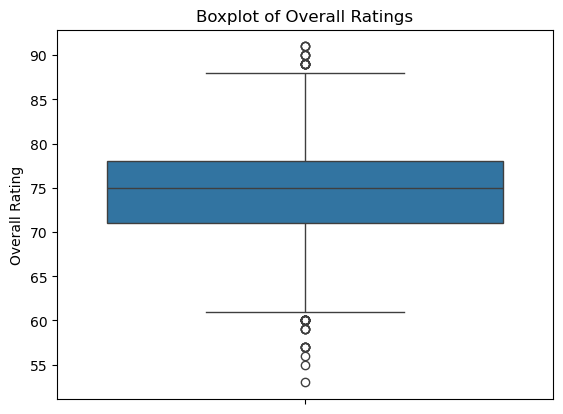

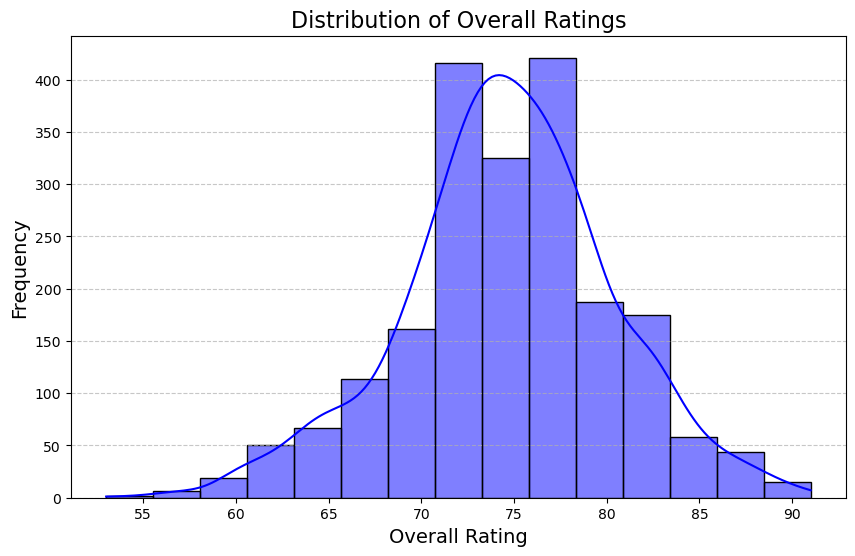

In [122]:

descriptive_stats = df["Overall"]
print(descriptive_stats.describe())
print(f"Median: {descriptive_stats.median()}")


# Boxplot
sns.boxplot(y=df['Overall'])
plt.title('Boxplot of Overall Ratings')
plt.ylabel('Overall Rating')



# Histogram
plt.figure(figsize=(10, 6))  
sns.histplot(df['Overall'], bins=15, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Overall Ratings', fontsize=16)
plt.xlabel('Overall Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()






## Correlation of Goals to Overall Rating

In [123]:
pearson_corr = df["Overall"].corr(df["Goals"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.4275
Interpretation: Moderate linear correlation.


In [124]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(df["Overall"], df["Goals"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: 0.4275
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


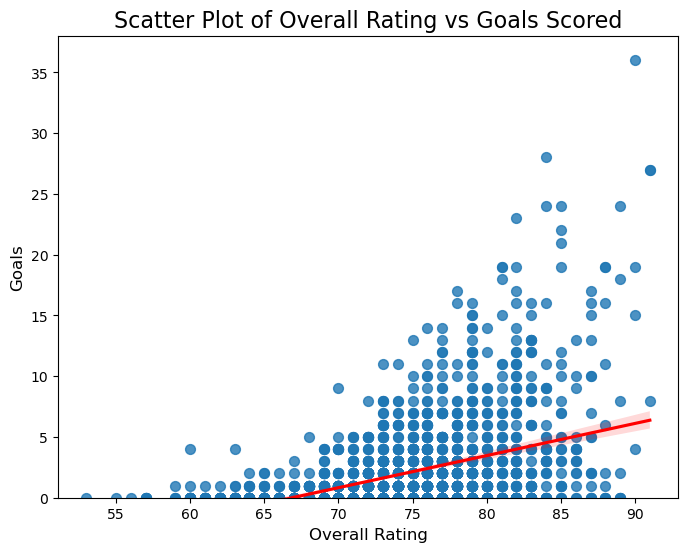

In [125]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="Overall", 
    y="Goals", 
    data=df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.ylim(0, None) 
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Goals", fontsize=12)
plt.title("Scatter Plot of Overall Rating vs Goals Scored", fontsize=16)

# display the plot
plt.show()

## Correlation of Assists to Overall Rating

In [126]:
pearson_corr = df["Overall"].corr(df["Assists"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.4485
Interpretation: Moderate linear correlation.


In [127]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(df["Overall"], df["Assists"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: 0.4485
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


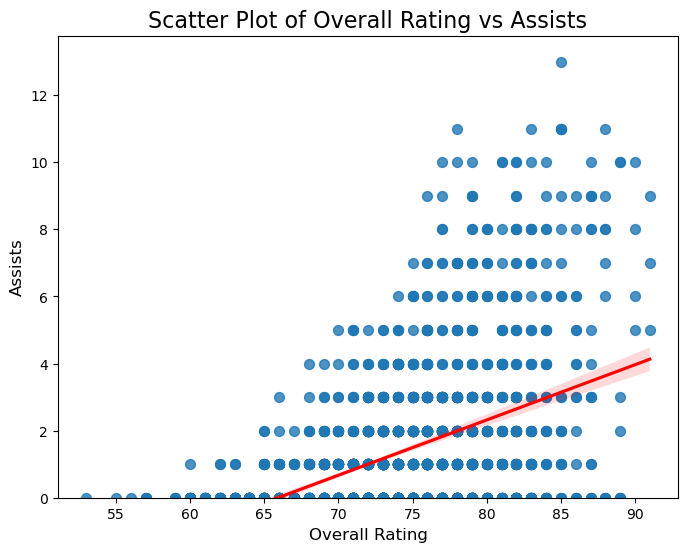

In [128]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="Overall", 
    y="Assists", 
    data=df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.ylim(0, None) 
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Assists", fontsize=12)
plt.title("Scatter Plot of Overall Rating vs Assists", fontsize=16)

# display the plot
plt.show()

## Correlation of Goals+Assists (Goal Contributions) to Overall Rating

In [129]:
# Create new G/A column
df['G/A'] = df['Goals'] + df['Assists']

pearson_corr = df["Overall"].corr(df["G/A"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")


Pearson Correlation: 0.4875
Interpretation: Moderate linear correlation.


In [130]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(df["Overall"], df["G/A"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: 0.4875
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


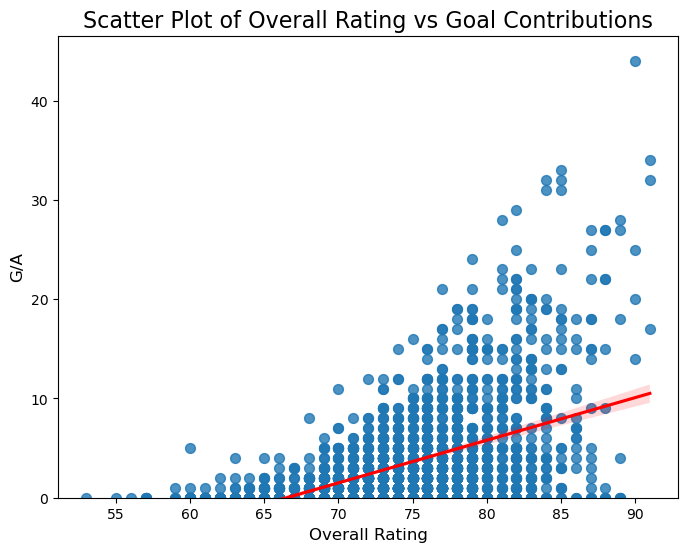

In [131]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="Overall", 
    y="G/A", 
    data=df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.ylim(0, None) 
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("G/A", fontsize=12)
plt.title("Scatter Plot of Overall Rating vs Goal Contributions", fontsize=16)

# display the plot
plt.show()

count    2060.000000
mean        3.474272
std         5.031018
min         0.000000
25%         0.000000
50%         2.000000
75%         5.000000
max        44.000000
Name: G/A, dtype: float64
Median: 2.0


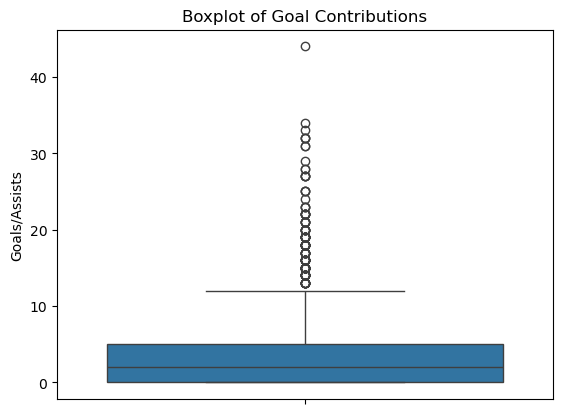

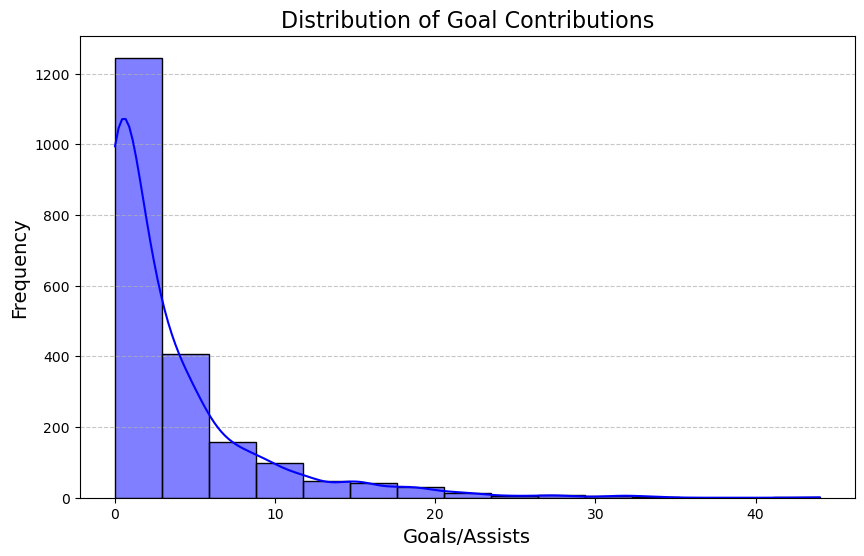

In [132]:
descriptive_stats2 = df["G/A"]
print(descriptive_stats2.describe())
print(f"Median: {descriptive_stats2.median()}")


# Boxplot
sns.boxplot(y=df['G/A'])
plt.title('Boxplot of Goal Contributions')
plt.ylabel('Goals/Assists')



# Histogram
plt.figure(figsize=(10, 6))  
sns.histplot(df['G/A'], bins=15, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Goal Contributions', fontsize=16)
plt.xlabel('Goals/Assists', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()


## Correlation of Age to Overall Rating

In [133]:
pearson_corr = df["Overall"].corr(df["Age"], method="pearson")

# display the result
print(f"Pearson Correlation: {pearson_corr:.4f}")

# interpretation
if abs(pearson_corr) < 0.3:
    print("Interpretation: No or weak linear correlation.")
elif 0.3 <= abs(pearson_corr) < 0.7:
    print("Interpretation: Moderate linear correlation.")
else:
    print("Interpretation: Strong linear correlation.")

Pearson Correlation: 0.3899
Interpretation: Moderate linear correlation.


In [134]:
# perform the Pearson correlation test
corr_stat, p_value = pearsonr(df["Overall"], df["Age"])

# display the correlation statistic and p-value
print(f"Pearson Correlation Coefficient: {corr_stat:.4f}")
print(f"P-value: {p_value:.4f}")

# interpretation based on p-value
alpha = 0.05  # significance level

if p_value > alpha:
    print("Fail to reject H0: No significant correlation (correlation = 0).")
else:
    print("Reject H0: Significant correlation exists (correlation != 0).")

Pearson Correlation Coefficient: 0.3899
P-value: 0.0000
Reject H0: Significant correlation exists (correlation != 0).


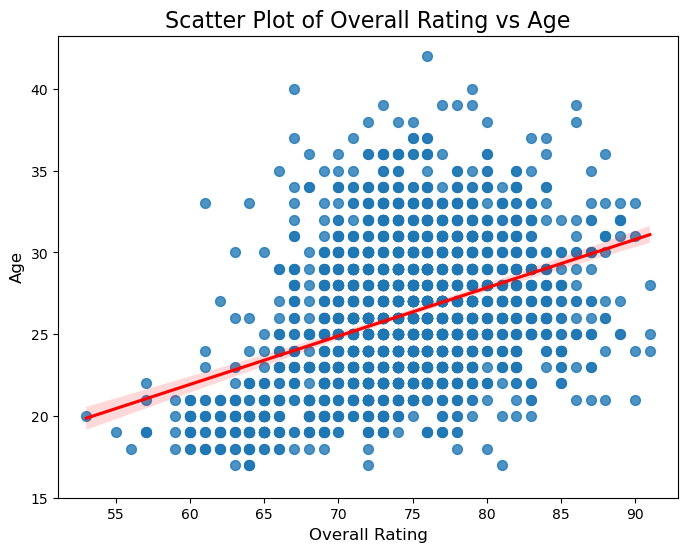

In [135]:
# create the scatter plot with a regression line using Seaborn
plt.figure(figsize=(8, 6))
sns.regplot(
    x="Overall", 
    y="Age", 
    data=df, 
    scatter_kws={"s": 50},  # adjust size of scatter points
    line_kws={"color": "red"},  # set line color
)

# add axis labels and title
plt.ylim(15, None) 
plt.xlabel("Overall Rating", fontsize=12)
plt.ylabel("Age", fontsize=12)
plt.title("Scatter Plot of Overall Rating vs Age", fontsize=16)

# display the plot
plt.show()

count    2060.000000
mean       26.245146
std         4.327824
min        17.000000
25%        23.000000
50%        26.000000
75%        29.000000
max        42.000000
Name: Age, dtype: float64
Median: 26.0


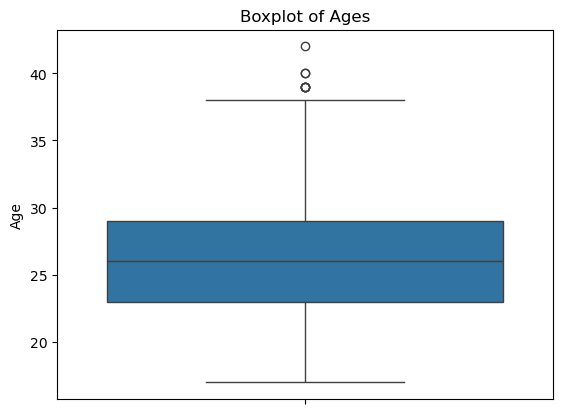

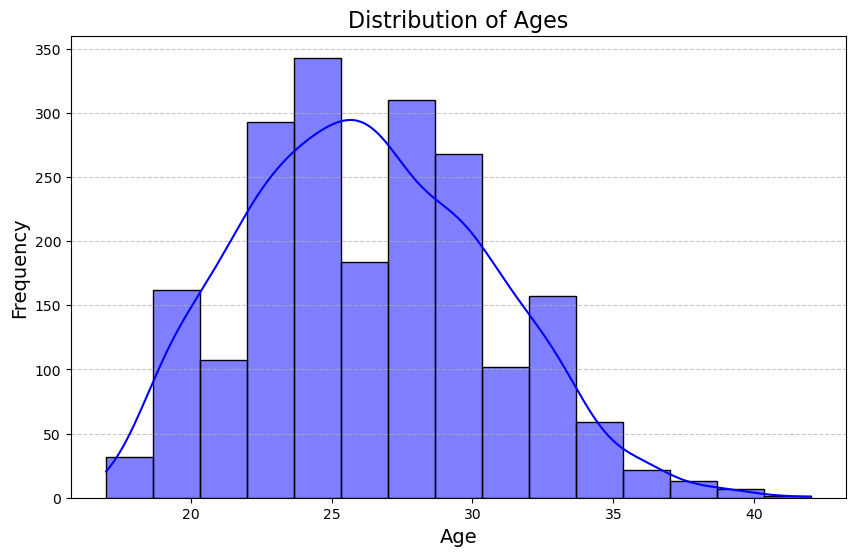

In [142]:
descriptive_stats3 = df["Age"]
print(descriptive_stats3.describe())
print(f"Median: {descriptive_stats3.median()}")


# Boxplot
sns.boxplot(y=df['Age'])
plt.title('Boxplot of Ages')
plt.ylabel('Age')



# Histogram
plt.figure(figsize=(10, 6))  
sns.histplot(df['Age'], bins=15, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the chart
plt.show()

## Linear Regression 

In [144]:
# Features and target
X = df[['Pace','Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality',
    'Age', 'Height_cm', 'Weight_kg']]
y = df['Overall']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("Mean Squared Error:", mse.round(2))
print("R-squared:", r2.round(2))
print("Coefficients:", model.coef_.round(2))
print("Intercept:", model.intercept_.round(2))

Mean Squared Error: 9.86
R-squared: 0.71
Coefficients: [ 0.04 -0.03  0.1   0.37  0.06  0.22  0.14  0.06  0.02]
Intercept: 5.56


In [137]:
# Features and target
X = df[['Goals', 'Assists', 'Expected Goals', 'Pace','Shooting', 'Passing', 'Dribbling', 'Defending', 'Physicality',
    'Age', 'Height_cm', 'Weight_kg']]
y = df['Overall']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions and metrics
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Results
print("Mean Squared Error:", mse.round(2))
print("R-squared:", r2.round(2))
print("Coefficients:", model.coef_.round(2))
print("Intercept:", model.intercept_.round(2))

Mean Squared Error: 8.02
R-squared: 0.77
Coefficients: [ 0.2   0.2   0.23  0.04 -0.07  0.11  0.34  0.08  0.17  0.17  0.07  0.04]
Intercept: 6.55


## Which club has the highest average FC25 overall rating 

In [138]:
average_club_ratings = (
    df.groupby("Club Team")["Overall"]
    .mean()
    .round()  # Round to 2 decimal places
    .reset_index()
    .sort_values(by="Overall", ascending=False)  # Sort in descending order
)

display(average_club_ratings)

,Club Team,Overall
57,Manchester City,84.0
6,Atlético Madrid,82.0
74,Real Madrid,82.0
2,Arsenal,81.0
41,Inter,81.0
...,...,...
24,Darmstadt 98,70.0
60,Metz,70.0
52,Lorient,70.0
82,Sheffield Utd,69.0


/var/folders/v8/zgfvsy5s4qx5hnf07ryy1j0m0000gn/T/ipykernel_36985/3454925316.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


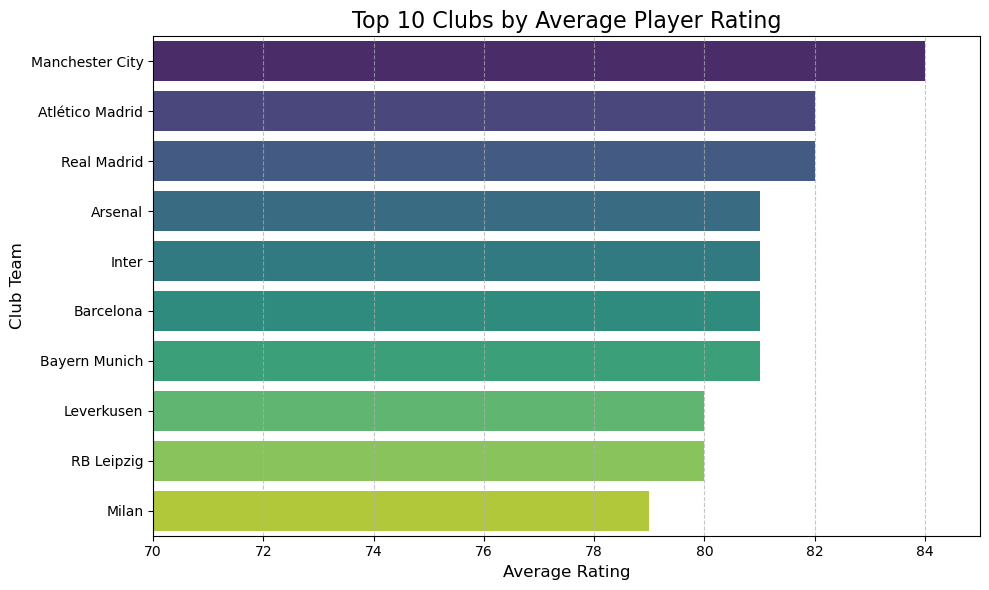

In [139]:
plt.figure(figsize=(10, 6))  
sns.barplot(
    x='Overall', 
    y='Club Team', 
    data=average_club_ratings.head(10), 
    palette='viridis',  
)

# Customize the chart
plt.title('Top 10 Clubs by Average Player Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Club Team', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(70, 85)
plt.tight_layout()

# Show the plot
plt.show()

## Which league has the highest average FC25 overall rating

In [140]:
average_league_ratings = (
    df.groupby("League")["Overall"]
    .mean()
    .round(2)  # Round to 2 decimal places
    .reset_index()
    .sort_values(by="Overall", ascending=False)  # Sort in descending order
)

display(average_league_ratings)


,League,Overall
3,Premier League,75.86
1,La Liga,75.65
0,Bundesliga,74.21
4,Serie A,73.94
2,Ligue 1,73.22


/var/folders/v8/zgfvsy5s4qx5hnf07ryy1j0m0000gn/T/ipykernel_36985/4234294759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


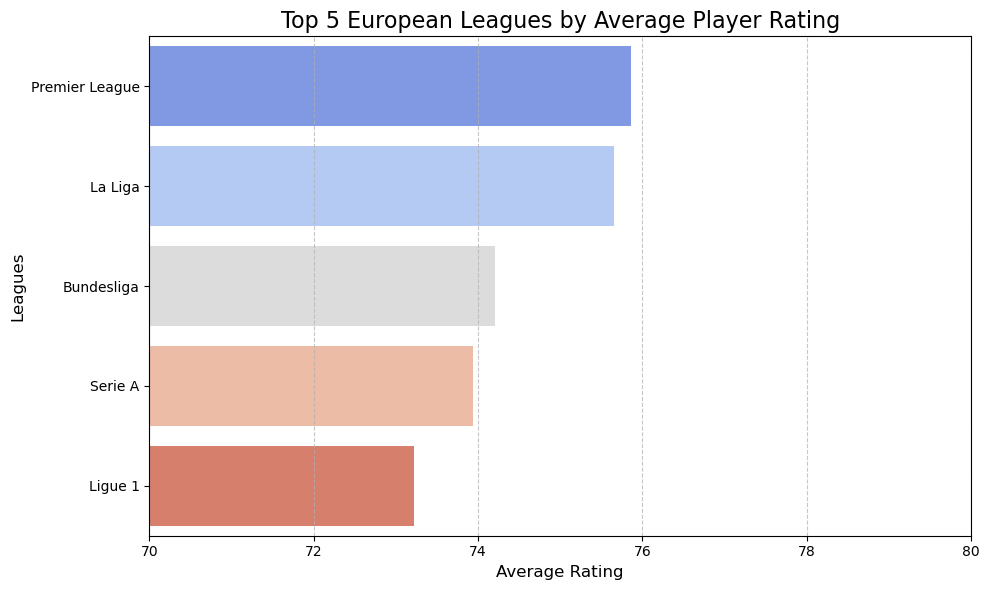

In [141]:
plt.figure(figsize=(10, 6))  
sns.barplot(
    x='Overall', 
    y='League', 
    data=average_league_ratings, 
    palette='coolwarm',  
)

# Customize the chart
plt.title('Top 5 European Leagues by Average Player Rating', fontsize=16)
plt.xlabel('Average Rating', fontsize=12)
plt.ylabel('Leagues', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xlim(70, 80)
plt.tight_layout()

# Show the plot
plt.show()